### Initial Importing Libraries

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns

In [38]:
import warnings
warnings.filterwarnings('ignore')

#### Dataset loading

In [39]:
df=sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [40]:
df.species.unique() #finding unique values

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [42]:
df.isnull().sum() #to calculate if any null values are there

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [44]:
df=df[df.species!='setosa'] #removing setosa rows

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [45]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


#### Encoding

In [46]:
df_one = pd.get_dummies(df["species"],dtype=int)
df_two = pd.concat((df,df_one), axis=1)
df_two = df_two.drop(["species"], axis=1)
df_two = df_two.drop(["versicolor"], axis=1)
df = df_two.rename(columns={"virginica": "species"})

In [47]:
print(df)

     sepal_length  sepal_width  petal_length  petal_width  species
50            7.0          3.2           4.7          1.4        0
51            6.4          3.2           4.5          1.5        0
52            6.9          3.1           4.9          1.5        0
53            5.5          2.3           4.0          1.3        0
54            6.5          2.8           4.6          1.5        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        1
146           6.3          2.5           5.0          1.9        1
147           6.5          3.0           5.2          2.0        1
148           6.2          3.4           5.4          2.3        1
149           5.9          3.0           5.1          1.8        1

[100 rows x 5 columns]


### Split dataset into independent and dependent features

In [11]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [12]:
X

,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
y

50     0
51     0
52     0
53     0
54     0
      ..
145    1
146    1
147    1
148    1
149    1
Name: species, Length: 100, dtype: int32

#### train test split

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,
                                               random_state=42)

#### Performing Logistic Regression for classification

In [50]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()

#### parameter tuning

In [55]:
from sklearn.model_selection import GridSearchCV
parameter={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],
           'max_iter':[100,200,300]}
classifier_regressor=GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv=5)
classifier_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [56]:
print(classifier_regressor.best_params_) #to get the best selected parameter

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}


In [57]:
print(classifier_regressor.best_score_) #best score

0.9733333333333334


#### prediction

In [58]:
y_pred=classifier_regressor.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score,classification_report

In [60]:
score=accuracy_score(y_pred,y_test)
print(score*100,'%')

92.0 %


In [28]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.91      0.91      0.91        11

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25



#### Correlation Heatmap

In [29]:
import matplotlib.pyplot as plt 

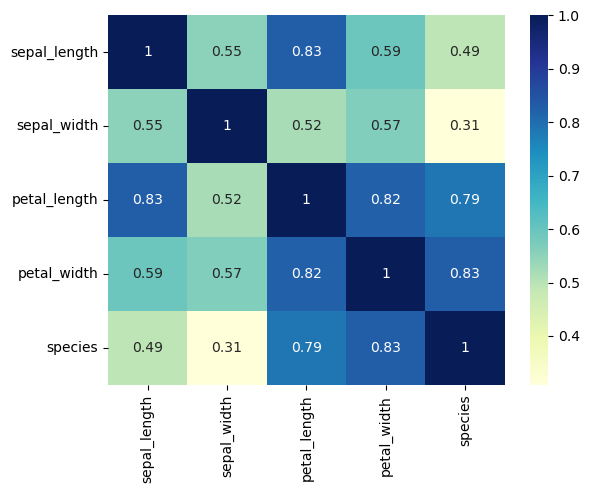

In [33]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True) 
plt.show() 